## Варіант 2 
## 2) $g(y)=y^2-2y-3$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import matplotlib.lines as mlines

def f(t,y):
    return y**2-2*y-3

# 2.1)
Зобразити векторне поле в точках $0 \pm 1 \pm 2 \pm 3 \pm 4$

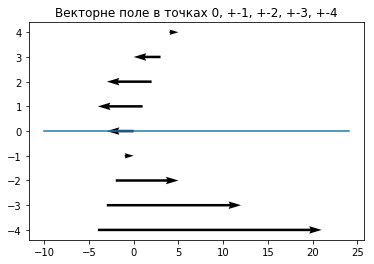

In [38]:
y = np.arange(-4, 5, 1)
vectors = f(0, y)


x = np.arange(-10, 25)
plt.title('Векторне поле в точках 0, +-1, +-2, +-3, +-4')
plt.plot(x, np.zeros_like(x))
plt.quiver(y, y, vectors - y, np.zeros_like(vectors), angles='xy', scale_units='xy', scale=1)

plt.show()

In [92]:
def plotdf(f, xran=[-10, 10], yran=[-10, 10], grid=[20, 20], color='k', pivot='mid'):
    """
    Допоміжна функція для зображення поля напрямків
    """
    x = np.linspace(xran[0], xran[1], grid[0])
    y = np.linspace(yran[0], yran[1], grid[1])
    def dX_dt(X, Y, t=0): return map(eval, f)
    
    X , Y  = np.meshgrid(x, y)  
    DX, DY = dX_dt(X, Y)        
    M = (np.hypot(DX, DY))      
    M[ M == 0] = 1.         
    DX = DX/M                   
    DY = DY/M  
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    plt.quiver(X, Y, DX, DY, pivot=pivot, color=color)
    plt.xlim(xran), plt.ylim(yran)
    plt.grid(True)

## 2.2) Інтегральні криві рівняння

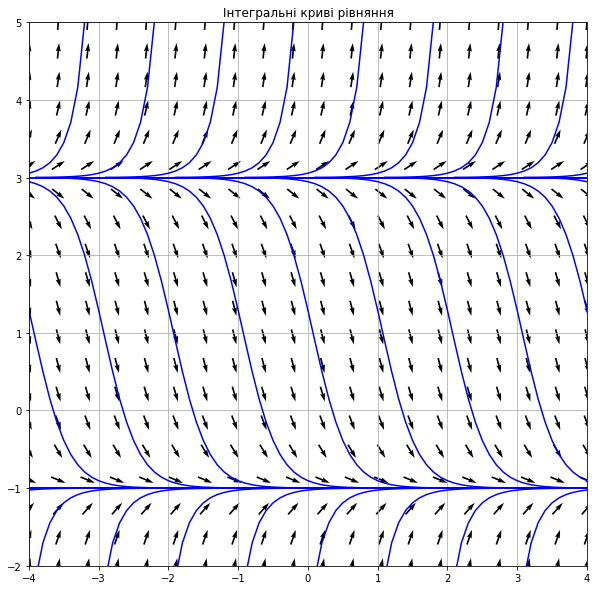

In [36]:
from scipy.integrate import ode

r = ode(f)
for j in [-1,-3,-0.99,3,3.001,2.999]:
    for i in np.arange(-6,4,1):
        r.set_initial_value(j,i)
        t1 = 10
        dt = 0.1
        x = []
        y = []
        while r.successful() and r.t < t1:
            x.append(r.t+dt)
            y.append(r.integrate(r.t+dt))
        plt.plot(x,y,'b')
plotdf(["1","Y**2-2*Y-3"], xran=[-4, 4], yran=[-2, 5])
plt.title("Інтегральні криві рівняння")
plt.show()

# 2.2)-2.3) Розв'язки визначені на 	$\mathbb{R}$ та Множина точок перегину

In [21]:
print("Розв`язки визначені на R:",list(np.roots([1,-2,-3])))
print("Множина точок перегину ",list(np.roots([1,-2,-3]))+list(np.roots([2,-2])))

Розв`язки визначені на R: [3.0000000000000004, -0.9999999999999998]
Множина точок перегину  [3.0000000000000004, -0.9999999999999998, 1.0]


## 2.4) Нехай - $y(x,y_0),x \in I_{y_0}$непродовжуваний розв'язок рівняння такий, що $y(0,y_0)=y_0$. Знайти явний вид інтегралу $I_{y_0}$.

$$y'=y^2-2y-3$$
$$\frac{y'}{y^2-2y-3}=1$$
$$\int \frac{y'}{y^2-2y-3}dx=\int 1dx+c$$
$$\int \frac{y'}{y^2-2y-3}dx=\frac{1}{4} ln\frac{y-3}{y+1}$$
$$\frac{y-3}{y+1}=e^{x+c} \Rightarrow y=-1+\frac{4}{1-ce^{4x}}$$

$$\left\{ \begin{array}{cc} y(x,y_0)=-1+\frac{4}{1-e^{4x}\frac{y_0-3}{y_0+1}}; & y_0=-1, y\equiv 3, y\equiv -1 \\
                              y \equiv -1; & I(x,y)
          \end{array}\right.$$ 
          
$$e^{4x} = \frac{y_0+1}{y_0-3}; y_0 \ne 3\  (y_0=3, y\equiv 3 \Rightarrow I_3=\mathbb{R})$$

#### Дослідження
$$1) \frac{y_0+1}{y_0-3}<0\ \Rightarrow y \in [-1,3]\ \Rightarrow\ I_{y_0}=\mathbb{R}$$
$$2) \frac{y_0+1}{y_0-3}>0\ \Rightarrow y \in (-\infty;-1)\cup(3;+\infty) \Rightarrow x_0=\frac{1}{4}ln\frac{y_0+1}{y_0-3}=\frac{1}{4}ln(1+\frac{4}{y_0-3}) $$
$$y_0\in (-\infty;-1) \Rightarrow y_0-3<-4<0 \Rightarrow \frac{1}{y_0-3}<0 \Rightarrow \frac{4}{y_0-3}+1<1 \Rightarrow x_0<0 \Rightarrow I_{y_0}=(x_0;+\infty)$$
$$y_0 in (3;=\infty) \Rightarrow y_0-3>0 \Rightarrow 1+\frac{4}{y_0-3}>1 \Rightarrow x_0>0 \Rightarrow I_{y_0}=(-\infty;x_0)$$

#### Таким чином:

$$ I_{y_0}\left\{ \begin{array}{cc}
            \left ( \frac{1}{4}ln\frac{y_0+1}{y_0-3};+\infty \right ), & y_0 \in (-\infty;-1)\\
            \mathbb{R}; & y_0 [-1;3]\\
            \left (-\infty; \frac{1}{4}ln\frac{y_0+1}{y_0-3} \right ), & y_0 \in (3;+\infty)
           \end{array}\right.$$
           
### 2.5)
$$ x>\frac{1}{4}ln\frac{y_0+1}{y_0-3} \iff \frac{y_0+1}{y_0-3}<e^{4x} \iff y_0>\frac{-1-3e^{4x}}{1-e^{4x}} \Rightarrow \forall x>0\  g(x)\ not\ defined\ y_0>\frac{-3e^{4x}-1}{1-e^{4x}} $$
### 2.6)
$$H=(-\infty;3]$$
### 2.7)
$$y_0=0 \Rightarrow y=-1+\frac{4}{3ce^{4x}+1}=\frac{3(1-e^{4x}}{1+3e^{4x}} \Rightarrow y(1)=\frac{3(1-e^4)}{1+3e^4}$$
$$y_0 \in [0;1] \Rightarrow y(1)=1+\frac{4}{1-e^4\left(1-\frac{4}{y_0+1}\right)} $$
$$y_0+1 \in [2;3] \Rightarrow \frac{4}{y_0+1} \in [2;4] \Rightarrow 1-\frac{1}{y_0+1} \in [-3;-1] \Rightarrow 1-(1-\frac{4}{y_0+1}e^{4} \in [-3e^4+1;1]$$
$$y(1) \in \left [-1+\frac{4}{-3e^4+1};-1\frac{4}{1+e^4} \right ] = \left [ \frac{3(1-e^{4x})}{1+3e^{4x}};1 \right ]=g'(I)$$
### 2.8)
$$y_0=3; y_0=-1$$




## 3) $y'=y^2-x$

In [131]:
import matplotlib.patches as mpatches

def f4(x,y):
    return y**2-x

### 3.1) Поле напрямків

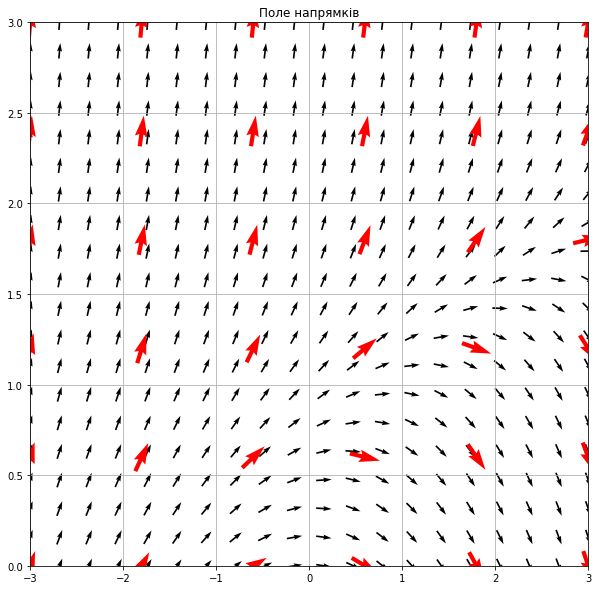

In [65]:
plotdf(["1","Y**2-X"],[-3,3],[0,3])
plotdf(["1","Y**2-X"],[-3,3],[0,3],[6,6],'r')
plt.title('Поле напрямків')
plt.show()

### 3.2)-3.5) Ізокліни, множина точок максимуму, області зростання та спадання

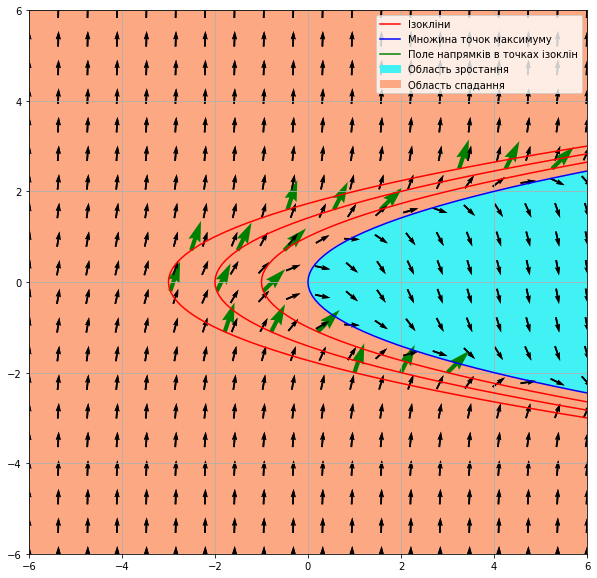

In [191]:
#будуемо області зростання та спадання
y = np.arange(-6,6,0.1)
x = (lambda x: x**2)(y)
plt.fill_between(x,y,color='#42f1f4')
plt.fill_betweenx(y,x,-6,color='#fca983')
plt.fill_between([-6,6],4,6, color='#fca983')

#будуемо поле напрямків
plotdf(["1","Y**2-X"],[-6,6],[-6,6])

#будуемо ізокліни
y = np.arange(-2,2.8,0.9)
for k in [1,2,3]:
    x = (lambda y: y**2-k)(y)
    for x_, y_ in zip(x,y):
          plotdf(["1","Y**2-X"],[x_,x_],[y_,y_],[1,1],'g','tail')

#будуемо множину точок максимуму
y = np.arange(-6,6,0.1)
x = (lambda x: x**2)(y)
plt.plot(x, y,'b')
plotdf(["1","Y**2-X"],[-6,6],[-6,6])
for k in [1,2,3]:
    plt.plot((lambda x: x**2-k)(y),y,'r')
    
plt.legend(handles=[mlines.Line2D([],[],color='red',label="Ізокліни"),
                    mlines.Line2D([],[],color='blue',label="Множина точок максимуму"),
                    mlines.Line2D([],[],color='green',label="Поле напрямків в точках ізоклін"),
                    mpatches.Patch(color = '#42f1f4', label="Область зростання"),
                    mpatches.Patch(color = '#fca983', label="Область спадання")])
plt.show()

### 3.6) Множина точок перегину інтегральних кривих та області де інтегральні кріви опуклі вгору та вниз
$$ x=\frac{2y^3-1}{2y}$$

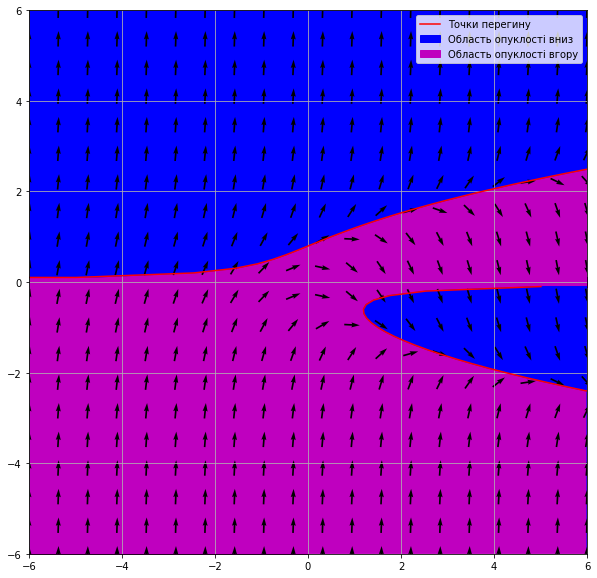

In [188]:
#будуемо області опуклості

y1 = np.arange(-6,-0.01,0.1)    
x1 = (lambda y:y**2-1/(2*y))(y1)

y2 = np.arange(0.01,6,0.1) 
x2 = (lambda y:y**2-1/(2*y))(y2)

plt.fill_betweenx(y1,x1,color='m')
plt.fill_between(x2,y2,color='m')
plt.fill_between([-6,6],-0.1,0.1,color='m')
plt.fill_between([-6,0],-6,0,color='m')

plt.fill_betweenx(y1,6,x1,color='b')
plt.fill_between(x2,y2,6,color='b')

#будуемо поле напрямків
plotdf(["1","Y**2-X"],[-6,6],[-6,6])

    
#множина точок перегину
y = np.arange(-6,-0.001,0.1)    
plt.plot((lambda y:y**2-1/(2*y))(y),y,'r')
y = np.arange(0.0001,6,0.1)    
plt.plot((lambda y:y**2-1/(2*y))(y),y,'r')
    
plt.legend(handles=[mlines.Line2D([],[],color='red',label="Точки перегину"),
                    mpatches.Patch(color = 'b', label="Область опуклості вниз"),
                    mpatches.Patch(color = 'm', label="Область опуклості вгору"),])
plt.show()

### 3.8) Метод Адамса

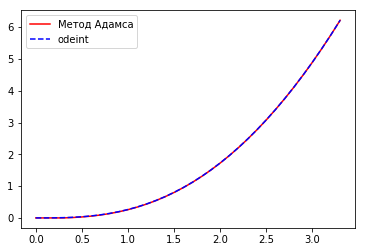

In [202]:
from scipy.integrate import odeint

def Adams(func, xn, y0):
    if len(xn) <= 4:
        return odeint(func, xn, y0)
    else:
        yn = np.zeros_like(xn)
        yn[:4] = odeint(func, y0, xn[:4])[0]   
        for i in range(3, len(xn)-1):
            h = xn[i+1] - xn[i]         
            tmp_y = yn[i] + h / 24 * (- 9 * func(yn[i-3], xn[i-3]) 
                                      + 37 * func(yn[i-2], xn[i-2]) 
                                      - 59 * func(yn[i-1], xn[i-1]) 
                                      + 55 * func(yn[i], xn[i],))
            yn[i+1] = yn[i] + h / 24 * (func(yn[i-2], xn[i-2]) 
                                        - 5 * func(yn[i-1], xn[i-1])
                                        + 19 * func(yn[i], xn[i])
                                        + 9 * func(tmp_y, xn[i+1]))  
        return yn
xn = np.arange(0, 3.4, 0.1)
yn = Adams(f4, xn, 0)
plt.plot(xn, yn, color='red', label='Метод Адамса')
xn = np.arange(0, 3.4, 0.1)
yn = odeint(f4, 0, xn)
plt.plot(xn, yn, '--b', label='odeint')
plt.legend()
plt.show()